In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train = pd.read_csv('D:\\Data_Science\\Datasets\\Machine learning\\Supervised_ML\\train.csv')
test = pd.read_csv('D:\\Data_Science\\Datasets\\Machine learning\\Supervised_ML\\test.csv')

In [5]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
train.shape

(8523, 12)

In [9]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [10]:
test.shape

(5681, 11)

In [11]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [12]:
train['source'] = "train"
test['source'] = 'test'
data = pd.concat([train,test], ignore_index=True)
print(data.shape)

(14204, 13)


In [13]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [14]:
data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,11765.0,12.792854,4.652502,4.555,8.710000,12.600000,16.750000,21.350000
Item_Visibility,14204.0,0.065953,0.051459,0.000,0.027036,0.054021,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290,94.012000,142.247000,185.855600,266.888400
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [17]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [18]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [19]:
data['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [22]:
data['Outlet_age'] = 2022 - data['Outlet_Establishment_Year']
print(data['Outlet_age'])

0        23
1        13
2        23
3        24
4        35
         ..
14199    25
14200    13
14201    20
14202    15
14203    20
Name: Outlet_age, Length: 14204, dtype: int64


In [23]:
data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [34]:
a  = data['Item_Fat_Content'].value_counts()
print(a)
b = (a/14204)*100
print(b)

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Low Fat    59.736694
Regular    33.962264
LF          3.675021
reg         1.372853
low fat     1.253168
Name: Item_Fat_Content, dtype: float64


In [35]:
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [36]:
data['Outlet_Size'].mode()[0]

'Medium'

In [37]:
data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

In [38]:
data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())

<AxesSubplot:>

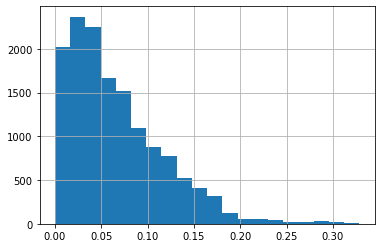

In [40]:
data['Item_Visibility'].hist(bins=20)

In [41]:
q1 = data['Item_Visibility'].quantile(0.25)
q3 = data['Item_Visibility'].quantile(0.75)
iqr = q3 - q1
print(iqr)

0.06700157100000001


In [50]:
fill_data = data.query('(@q1 - 1.5 * @iqr) <= Item_Visibility <= (@q3 + 1.5 * @iqr)') 

In [51]:
fill_data.shape

(13943, 14)

In [53]:
fill_data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,13


In [55]:
data = fill_data
data.shape

(13943, 14)

In [57]:
data['item_visibility_bins'] = pd.cut(data['Item_Visibility'],[0.000, 0.065, 0.13,0.2], labels = ['low_vis','hig','high_viz'] )

<ipython-input-57-0eb821f0d52e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['item_visibility_bins'] = pd.cut(data['Item_Visibility'],[0.000, 0.065, 0.13,0.2], labels = ['low_vis','hig','high_viz'] )


In [58]:
data['item_visibility_bins'].value_counts()

low_vis     7363
hig         4283
high_viz    1418
Name: item_visibility_bins, dtype: int64

In [60]:
data['item_visibility_bins'] = data['item_visibility_bins'].replace(np.nan,'low_viz', regex = True)

<ipython-input-60-e67e658e61b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['item_visibility_bins'] = data['item_visibility_bins'].replace(np.nan,'low_viz', regex = True)


In [64]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat')

<ipython-input-64-77d66255964c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat')


In [65]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace('reg','Regular')

<ipython-input-65-df0b77500d42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Item_Fat_Content'] = data['Item_Fat_Content'].replace('reg','Regular')


In [67]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(['Low_Fat'], 'Low Fat')

<ipython-input-67-4a2afc983c35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(['Low_Fat'], 'Low Fat')


In [68]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [69]:
le = LabelEncoder()

In [70]:
data['Item_Fat_Content'] = le.fit_transform(data['Item_Fat_Content'])

<ipython-input-70-2404964f949f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Item_Fat_Content'] = le.fit_transform(data['Item_Fat_Content'])


In [71]:
data['item_visibility_bins'] = le.fit_transform(data['item_visibility_bins'])

<ipython-input-71-f5ece46b19e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['item_visibility_bins'] = le.fit_transform(data['item_visibility_bins'])


In [72]:
data['Outlet_Size'] = le.fit_transform(data['Outlet_Size'])

<ipython-input-72-45d161282a44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Outlet_Size'] = le.fit_transform(data['Outlet_Size'])


In [73]:
data['Outlet_Location_Type'] = le.fit_transform(data['Outlet_Location_Type'])

<ipython-input-73-2a39b23e6f10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Outlet_Location_Type'] = le.fit_transform(data['Outlet_Location_Type'])


In [74]:
data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [75]:
dummy = pd.get_dummies(data['Outlet_Type'])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [76]:
data['Item_Identifier']

0        FDA15
1        DRC01
2        FDN15
3        FDX07
4        NCD19
         ...  
14199    FDB58
14200    FDD47
14201    NCO17
14202    FDJ26
14203    FDU37
Name: Item_Identifier, Length: 13943, dtype: object

In [78]:
len(data['Item_Identifier'].value_counts())

1559

In [80]:
data['item_type_combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['item_type_combined'] = data['item_type_combined'].map({'FD': 'Food',
                                                            'NC':'Non consumable',
                                                            'DR': 'Drinks'})

<ipython-input-80-60ec76694403>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['item_type_combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
<ipython-input-80-60ec76694403>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['item_type_combined'] = data['item_type_combined'].map({'FD': 'Food',


In [83]:
data['item_type_combined'].value_counts()

Food              9991
Non consumable    2652
Drinks            1300
Name: item_type_combined, dtype: int64

In [84]:
data.shape

(13943, 16)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13943 entries, 0 to 14203
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            13943 non-null  object 
 1   Item_Weight                13943 non-null  float64
 2   Item_Fat_Content           13943 non-null  int32  
 3   Item_Visibility            13943 non-null  float64
 4   Item_Type                  13943 non-null  object 
 5   Item_MRP                   13943 non-null  float64
 6   Outlet_Identifier          13943 non-null  object 
 7   Outlet_Establishment_Year  13943 non-null  int64  
 8   Outlet_Size                13943 non-null  int32  
 9   Outlet_Location_Type       13943 non-null  int32  
 10  Outlet_Type                13943 non-null  object 
 11  Item_Outlet_Sales          8375 non-null   float64
 12  source                     13943 non-null  object 
 13  Outlet_age                 13943 non-null  int

In [86]:
data = pd.get_dummies(data, columns = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','item_type_combined'])

In [87]:
data.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_Type                             object
Item_MRP                             float64
Outlet_Identifier                     object
Outlet_Establishment_Year              int64
Item_Outlet_Sales                    float64
source                                object
Outlet_age                             int64
item_visibility_bins                   int32
Item_Fat_Content_0                     uint8
Item_Fat_Content_1                     uint8
Outlet_Location_Type_0                 uint8
Outlet_Location_Type_1                 uint8
Outlet_Location_Type_2                 uint8
Outlet_Size_0                          uint8
Outlet_Size_1                          uint8
Outlet_Size_2                          uint8
Outlet_Type_Grocery Store              uint8
Outlet_Type_Supermarket Type1          uint8
Outlet_Type_Supermarket Type2          uint8
Outlet_Typ

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13943 entries, 0 to 14203
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Item_Identifier                    13943 non-null  object 
 1   Item_Weight                        13943 non-null  float64
 2   Item_Visibility                    13943 non-null  float64
 3   Item_MRP                           13943 non-null  float64
 4   Outlet_Identifier                  13943 non-null  object 
 5   Item_Outlet_Sales                  8375 non-null   float64
 6   source                             13943 non-null  object 
 7   Outlet_age                         13943 non-null  int64  
 8   item_visibility_bins               13943 non-null  int32  
 9   Item_Fat_Content_0                 13943 non-null  uint8  
 10  Item_Fat_Content_1                 13943 non-null  uint8  
 11  Outlet_Location_Type_0             13943 non-null  uin

In [94]:
import warnings 
warnings.filterwarnings('ignore')
train = data.loc[data['source'] == "train"]
test = data.loc[data['source'] == "test"]
test.drop(['Item_Outlet_Sales','source'], axis =1,inplace = True)
train.drop(['source'],axis = 1,inplace = True)

In [96]:
train.to_csv("train_modified.csv" ,index= False)
test.to_csv("test_modified.csv", index = False)

In [97]:
train2 = pd.read_csv('train_modified.csv')
test2 = pd.read_csv('test_modified.csv')

In [98]:
train2.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet_age,item_visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,item_type_combined_Drinks,item_type_combined_Food,item_type_combined_Non consumable
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,23,2,1,0,...,0,1,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,13,2,0,1,...,0,1,0,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,23,2,1,0,...,0,1,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.000000,182.0950,OUT010,732.3800,24,3,0,1,...,0,1,0,1,0,0,0,0,1,0
4,NCD19,8.93,0.000000,53.8614,OUT013,994.7052,35,3,1,0,...,1,0,0,0,1,0,0,0,0,1


In [99]:
train2.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_MRP                             float64
Outlet_Identifier                     object
Item_Outlet_Sales                    float64
Outlet_age                             int64
item_visibility_bins                   int64
Item_Fat_Content_0                     int64
Item_Fat_Content_1                     int64
Outlet_Location_Type_0                 int64
Outlet_Location_Type_1                 int64
Outlet_Location_Type_2                 int64
Outlet_Size_0                          int64
Outlet_Size_1                          int64
Outlet_Size_2                          int64
Outlet_Type_Grocery Store              int64
Outlet_Type_Supermarket Type1          int64
Outlet_Type_Supermarket Type2          int64
Outlet_Type_Supermarket Type3          int64
item_type_combined_Drinks              int64
item_type_combined_Food                int64
item_type_

In [101]:
test2.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_MRP                             float64
Outlet_Identifier                     object
Outlet_age                             int64
item_visibility_bins                   int64
Item_Fat_Content_0                     int64
Item_Fat_Content_1                     int64
Outlet_Location_Type_0                 int64
Outlet_Location_Type_1                 int64
Outlet_Location_Type_2                 int64
Outlet_Size_0                          int64
Outlet_Size_1                          int64
Outlet_Size_2                          int64
Outlet_Type_Grocery Store              int64
Outlet_Type_Supermarket Type1          int64
Outlet_Type_Supermarket Type2          int64
Outlet_Type_Supermarket Type3          int64
item_type_combined_Drinks              int64
item_type_combined_Food                int64
item_type_combined_Non consumable      int64
dtype: obj

In [102]:
x_train = train2.drop(['Item_Outlet_Sales','Outlet_Identifier','Item_Identifier'], axis = 1)
y_train = train2.Item_Outlet_Sales

In [103]:
x_test = test2.drop(['Outlet_Identifier','Item_Identifier'], axis =1)


In [105]:
x_train

,Item_Weight,Item_Visibility,Item_MRP,Outlet_age,item_visibility_bins,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,item_type_combined_Drinks,item_type_combined_Food,item_type_combined_Non consumable
0,9.300,0.016047,249.8092,23,2,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,5.920,0.019278,48.2692,13,2,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0
2,17.500,0.016760,141.6180,23,2,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,19.200,0.000000,182.0950,24,3,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0
4,8.930,0.000000,53.8614,35,3,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8370,6.865,0.056783,214.5218,35,2,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0
8371,8.380,0.046982,108.1570,20,2,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
8372,10.600,0.035186,85.1224,18,2,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
8373,7.210,0.145221,103.1332,13,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0


In [106]:
y_train

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8370    2778.3834
8371     549.2850
8372    1193.1136
8373    1845.5976
8374     765.6700
Name: Item_Outlet_Sales, Length: 8375, dtype: float64

In [107]:
from sklearn import model_selection 
from sklearn.linear_model import LinearRegression

In [108]:
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(x_train,y_train, test_size=0.3, random_state=42)

In [109]:
lin = LinearRegression()

In [111]:
lin.fit(xtrain,ytrain)

LinearRegression()

In [112]:
print(lin.coef_)
lin.intercept_

[-1.93243906e+00 -1.61971781e+02  1.58837774e+01 -3.19356058e+01
  1.09518406e+01 -1.45227064e+00  1.45227064e+00  1.88931671e+02
  4.81430478e+01 -2.37074719e+02  5.39766788e+02 -3.11433271e+02
 -2.28333517e+02 -1.63571883e+03 -1.26147671e+02 -3.48470185e+02
  2.11033668e+03  8.77661536e+00  3.46794676e+01 -4.34560830e+01]


1040.4391904686217

In [113]:
prediction = lin.predict(xtest)
prediction

array([2073.18597139, 3704.42370307, 2958.73115907, ..., 3531.69383949,
       3471.79229724, 1243.20263847])

In [114]:
import math

In [115]:
print(math.sqrt(mean_squared_error(ytest,prediction)))

1126.414880164419


In [116]:
y_sales_pred = lin.predict(x_test)
y_sales_pred

array([1784.33763292, 1594.70744683, 1840.47107962, ..., 1822.25014169,
       3620.39303773, 1280.56293543])

In [117]:
test_prediction = pd.DataFrame({
    'Item_Identifier':test2['Item_Identifier'],
     'Outlet_Identifier': test2['Outlet_Identifier'],
     'Item_Outlet_Sales':y_sales_pred
}, columns = ['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [122]:
print("Dimension of prediction is :", test_prediction.shape)
test_prediction.head()

Dimension of prediction is : (5568, 3)


,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1784.337633
1,FDW14,OUT017,1594.707447
2,NCN55,OUT010,1840.471080
3,FDQ58,OUT017,2672.995348
4,FDY38,OUT027,5133.308220
